# Estación Farolillo

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [10, 5]

import warnings
warnings.filterwarnings('ignore')

In [2]:
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf
from itertools import product

In [3]:
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_squared_error
from tqdm import tqdm

In [4]:
df = pd.read_csv("../data/df_18.csv", index_col=0)
df.index = pd.to_datetime(df.index)

In [5]:
df.head()

,NO2
month,
2013-01-01,43.032258
2013-02-01,32.741935
2013-03-01,26.161290
2013-04-01,24.419355
2013-05-01,25.000000


### Estacionalidad

In [6]:
df2 = df.copy()

In [7]:
df2["año"] = df.index.year
df2["mes"] = df.index.month

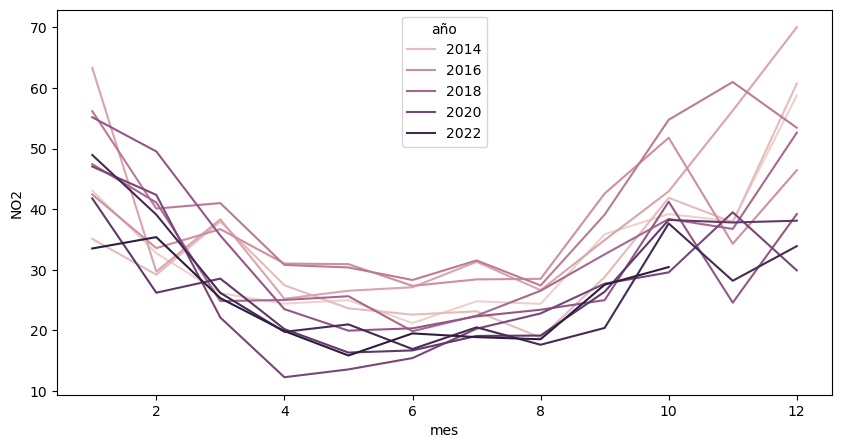

In [8]:
sns.lineplot(x = "mes", y = "NO2", hue = "año", data = df2);

### Estacionaridad

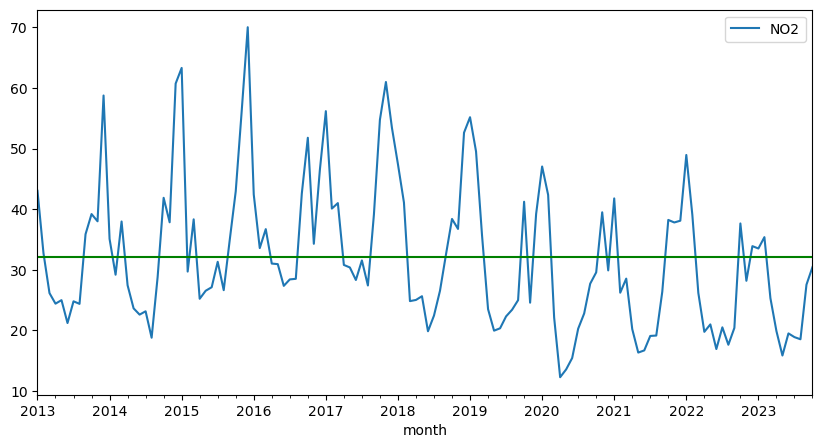

In [9]:
df.plot()
plt.axhline(df.NO2.mean(), c = "g");

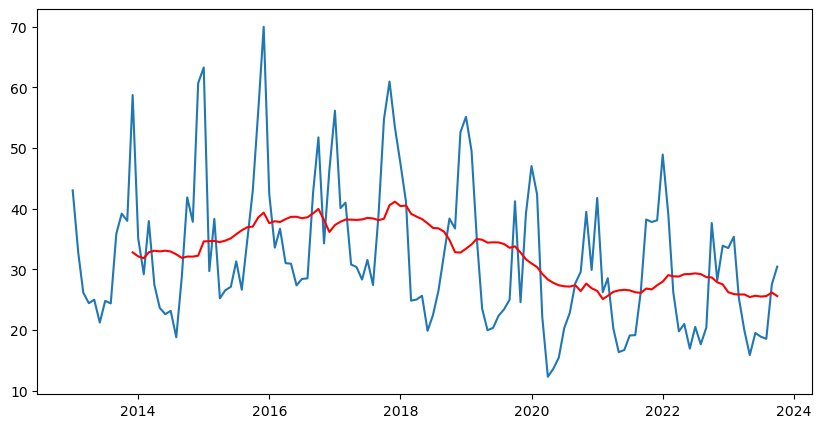

In [10]:
plt.plot(df["NO2"])
plt.plot(df.rolling(window= 12).mean(), c = "r");

### Test de Fuller

In [11]:
res = adfuller(df["NO2"])
res

(-0.6026014244286656,
 0.8703931273892895,
 11,
 118,
 {'1%': -3.4870216863700767,
  '5%': -2.8863625166643136,
  '10%': -2.580009026141913},
 795.1125907596379)

In [12]:
print("AD Fuller Stats", res[0])
print("p-value", res[1])
print("Critical values")

for k, v in res[4].items():
    print(k, round(v, 2))

AD Fuller Stats -0.6026014244286656
p-value 0.8703931273892895
Critical values
1% -3.49
5% -2.89
10% -2.58


*Datos no estacionarios. Su media y su varianza están en función del tiempo 🍋*

### Autocorrelación

In [13]:
for i in range(49):
    print(f"{i} mes Lag, {df['NO2'].autocorr(lag= i)}")

0 mes Lag, 1.0
1 mes Lag, 0.6777705921404845
2 mes Lag, 0.40577683748333326
3 mes Lag, 0.15720484026354306
4 mes Lag, -0.14477116129311798
5 mes Lag, -0.33354714832746907
6 mes Lag, -0.39750506425050364
7 mes Lag, -0.35559396658670894
8 mes Lag, -0.18648871913701698
9 mes Lag, 0.12615124536061897
10 mes Lag, 0.3952367176480835
11 mes Lag, 0.5886145644428208
12 mes Lag, 0.733437533521389
13 mes Lag, 0.6503055091631531
14 mes Lag, 0.4041252460418971
15 mes Lag, 0.15236538238361655
16 mes Lag, -0.16337958491348994
17 mes Lag, -0.37038684173033115
18 mes Lag, -0.45110910124256715
19 mes Lag, -0.3975530557799653
20 mes Lag, -0.2136291880546371
21 mes Lag, 0.07533012140620866
22 mes Lag, 0.2927192826239613
23 mes Lag, 0.5604966634049197
24 mes Lag, 0.7298886745727197
25 mes Lag, 0.5720951913751408
26 mes Lag, 0.3428435997858692
27 mes Lag, 0.09904187065089709
28 mes Lag, -0.22346262092121943
29 mes Lag, -0.43323194820005123
30 mes Lag, -0.5305908551966624
31 mes Lag, -0.4689067833057436
32 m

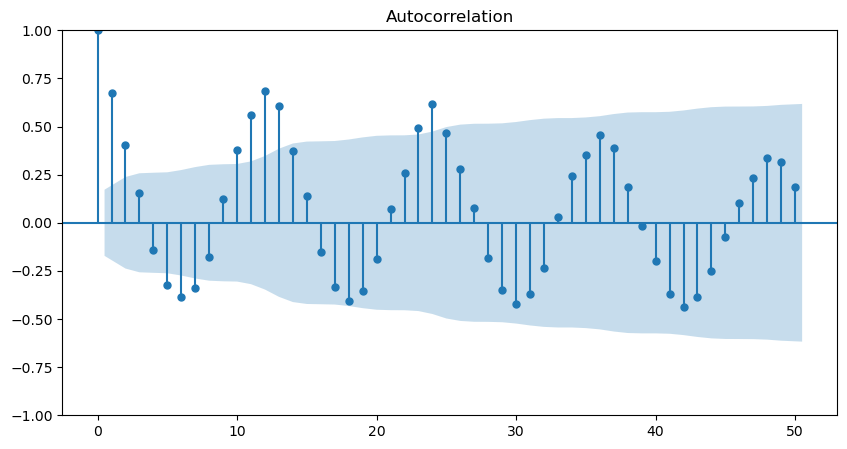

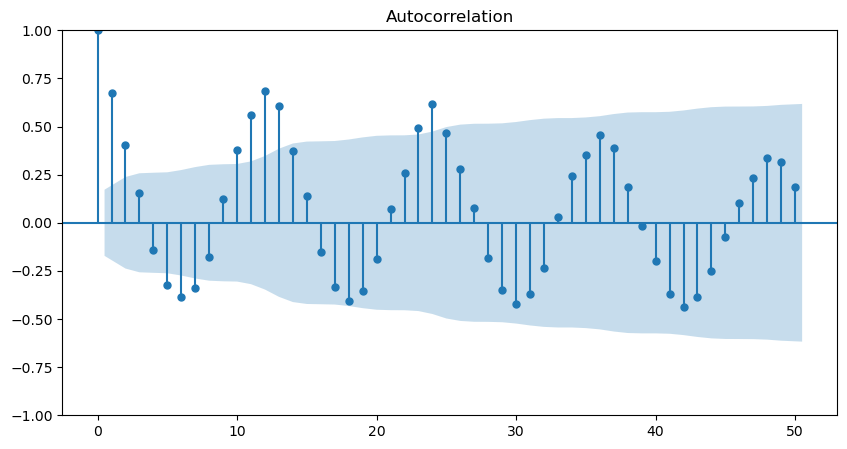

In [14]:
plot_acf(df, lags = 50)

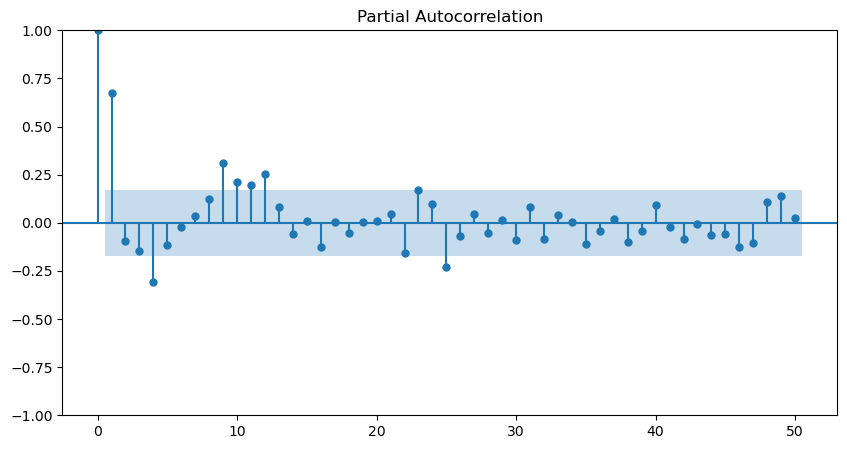

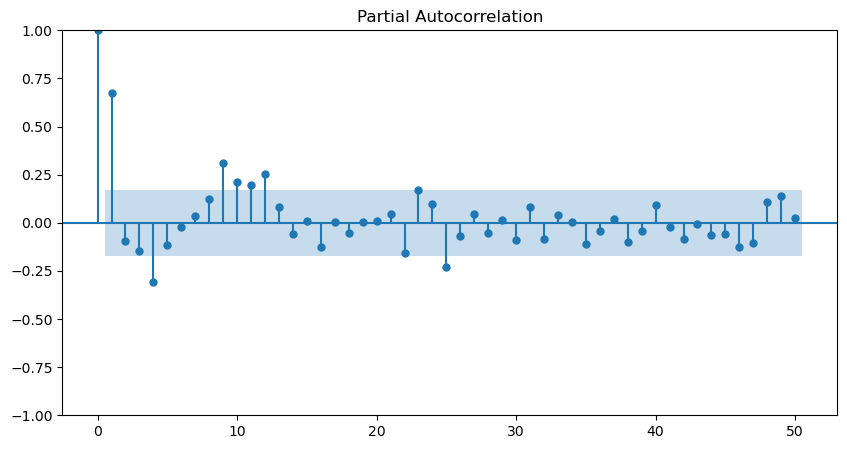

In [15]:
plot_pacf(df, lags = 50)

In [16]:
df.head()

,NO2
month,
2013-01-01,43.032258
2013-02-01,32.741935
2013-03-01,26.161290
2013-04-01,24.419355
2013-05-01,25.000000


In [17]:
df.shape

(130, 1)

In [18]:
df.isnull().sum()

NO2    0
dtype: int64

## SARIMA

In [19]:
y_test = df["NO2"][-30:]
y_train = df["NO2"][:-30]

In [20]:
ps = range(4)
ds = range(1,3)
qs = range(3)

parameters = list(product(ps,ds, qs))
print(parameters)

[(0, 1, 0), (0, 1, 1), (0, 1, 2), (0, 2, 0), (0, 2, 1), (0, 2, 2), (1, 1, 0), (1, 1, 1), (1, 1, 2), (1, 2, 0), (1, 2, 1), (1, 2, 2), (2, 1, 0), (2, 1, 1), (2, 1, 2), (2, 2, 0), (2, 2, 1), (2, 2, 2), (3, 1, 0), (3, 1, 1), (3, 1, 2), (3, 2, 0), (3, 2, 1), (3, 2, 2)]


In [21]:
%%time

modelo=SARIMAX(endog=y_train, 
               exog=None,
               #order=(4, 1, 5),  # modelo arima
               seasonal_order=(4, 1, 3, 12) # modelo sarima, estacionalidad es el ultimo
              ).fit(disp=False)
                     
pred=modelo.predict(len(y_train), len(df)-1)  

error=(pred-y_test).abs().sum()/len(pred) 
print ('Error mae: ', error)


res=pd.DataFrame({'real':y_test, 'pred':pred, 'error':pred-y_test})
res

C:\Users\ccior\anaconda3\envs\proyecto\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\ccior\anaconda3\envs\proyecto\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\ccior\anaconda3\envs\proyecto\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Error mae:  4.510617843911555
CPU times: total: 1.03 s
Wall time: 7.43 s


,real,pred,error
2021-05-01,16.354839,18.342770,1.987932
2021-06-01,16.709677,18.575963,1.866285
2021-07-01,19.096774,20.969279,1.872505
2021-08-01,19.161290,22.695246,3.533956
2021-09-01,26.387097,26.173282,-0.213815
2021-10-01,38.225806,35.338747,-2.887059
2021-11-01,37.806452,26.098649,-11.707803
2021-12-01,38.096774,41.451083,3.354309
2022-01-01,48.935484,49.618854,0.683370
2022-02-01,39.096774,35.691052,-3.405722


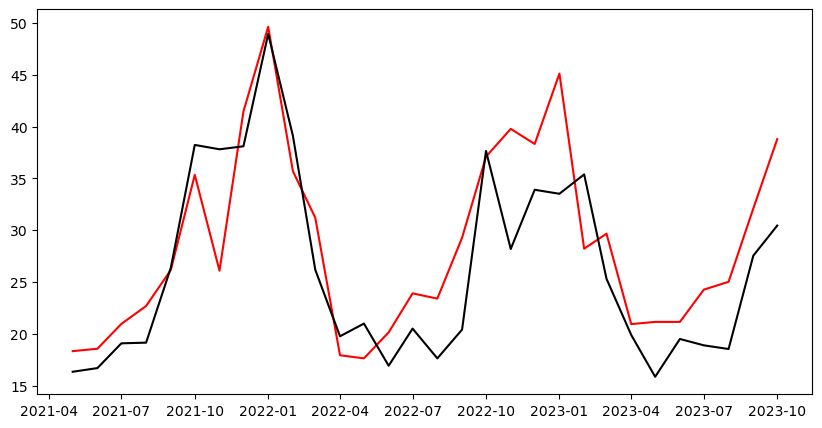

In [22]:
plt.plot(res["pred"], c = "r")
plt.plot(res["real"], c = "black");

In [23]:
pred_año = pd.DataFrame(modelo.predict(start = len(df), end = len(df) + 12))
pred_año

,predicted_mean
2023-11-01,38.602418
2023-12-01,42.973461
2024-01-01,51.016508
2024-02-01,34.360080
2024-03-01,34.774491
2024-04-01,23.887006
2024-05-01,23.100006
2024-06-01,23.265551
2024-07-01,26.044697
2024-08-01,25.808596


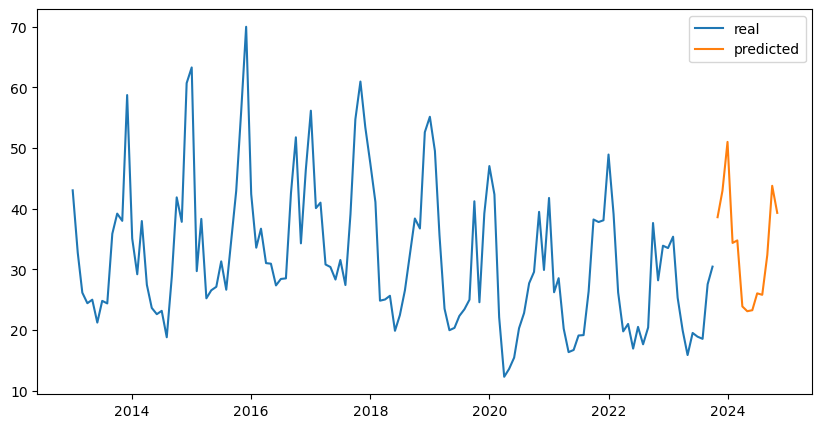

In [24]:
plt.plot(df)
plt.plot(pred_año)
plt.legend(["real", "predicted"]);

In [25]:
pred_año.mean()

predicted_mean    33.79315
dtype: float64